# Lending Club Case Study

**Problem Statement**


Identify the risky loan applicants (who likely default), then such loans can be reduced thereby cutting down the amount of credit loss. The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.  Identification of such applicants using EDA is the aim of this case study. 


### Data Handling and Cleaning

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# <a id='1'>1.Data</a>

In [3]:
#read the dataset and check the first five rows
loan = pd.read_csv("loan.csv")
loan.head()

C:\Users\nitu3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## <a id='1.1'>1.1. Data overview</a>

In [4]:
print ("Rows     : " ,loan.shape[0])
print ("Columns  : " ,loan.shape[1])
print ("\nFeatures : \n" ,loan.columns.tolist())
print ("\nMissing values :  ", loan.isnull().sum().values.sum())
print ("\nUnique values :  \n",loan.nunique())

Rows     :  39717
Columns  :  111

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'ope

In [5]:
#Check the datatypes of all the columns of the dataframe
loan.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\nitu3\AppData\Local\Temp/ipykernel_19844/10506949.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  loan.info(verbose=True, null_counts=True)


## <a id='1.2'>1.2. Data Handling and Cleaning</a>

In [6]:
#dropping unwanted columns
loan.drop(['id','pymnt_plan', 'url', 'desc', 'title', 'mths_since_last_major_derog'], axis=1, inplace=True)

In [7]:
loan.shape

(39717, 105)

In [8]:
empty_cols = loan.isnull().sum().sort_values(ascending=False).head(56)
empty_cols

tot_cur_bal                       39717
mort_acc                          39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
mo_sin_rcnt_tl                    39717
mths_since_recent_bc              39717


In [9]:
#Since the above 49 columns are all empty or almost empty, so dropping them also
loan.drop(empty_cols.index, axis=1, inplace=True)

In [10]:
loan.isnull().sum().sort_values(ascending=False).head(10)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
last_credit_pull_d               2
total_rec_int                    0
dtype: int64

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [12]:
loan.shape

(39717, 49)

In [13]:
loan.int_rate = loan.int_rate.apply(lambda x: float(x.replace("%", "")))

In [14]:
loan.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [15]:
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [16]:
loan.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [17]:
#since tax_lines,chargeoff_within_12_mths,collections_12_mths_ex_med all values are zero, dropping this column too
loan.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1, inplace=True)

In [18]:
#since emp_title has no important in this analysis, dropping that column too
loan.drop(['emp_title'], axis=1, inplace=True)

In [19]:
loan['emp_length'] = loan['emp_length'].fillna(0)
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(0)
loan['revol_util'] = loan['revol_util'].fillna(0)
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].fillna(0)


In [20]:
#dropping columns last_pymnt_d and last_pymnt_amnt
loan.drop(['last_pymnt_d','last_pymnt_amnt'], axis=1, inplace=True)

In [21]:
loan.isnull().sum().sort_values(ascending=False)

member_id                  0
total_rec_prncp            0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_int              0
open_acc                   0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_credit_pull_d         0
policy_code                0
application_type           0
acc_now_delinq             0
delinq_amnt                0
pub_rec                    0
inq_last_6mths             0
loan_amnt                  0
home_ownership             0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
annual_inc                 0
earliest_cr_line           0
verification_s

In [22]:
loan.shape

(39717, 43)

In [23]:
#Here we are removing those loans which are neither fully paid or defaulted
loan = loan[loan['loan_status'] != 'Current']
#Here we are assigning loan_status as 0 if fully paid else if default 1
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))
#This is the overall default rate
round(np.mean(loan['loan_status']), 2)

0.15

In [24]:
#Overall default rate


In [25]:
type(loan.emp_length)

pandas.core.series.Series

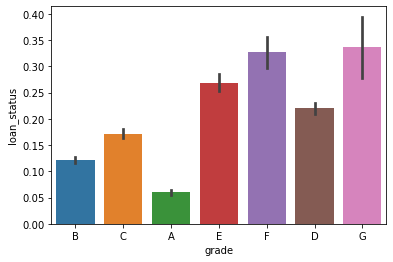

In [26]:
# we are doing univariate analysis of grade of loan between grade assigned with loan_status. Here 0 represents fully paid loans
# and 1 represents the default loan
#Here we see that a grade has the lowest rate of default
g=sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

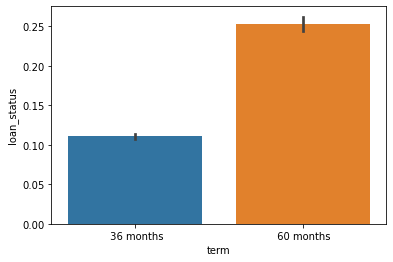

In [27]:
# we are doing univariate analysis with period of loan against loan status. Here we see as the period increases so does the possibility of default
sns.barplot(x='term', y='loan_status', data=loan)
plt.show()

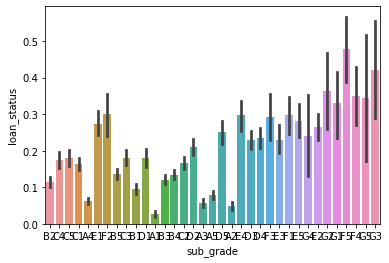

In [28]:
#disregard this
sns.barplot(x='sub_grade', y='loan_status', data=loan)
plt.show()

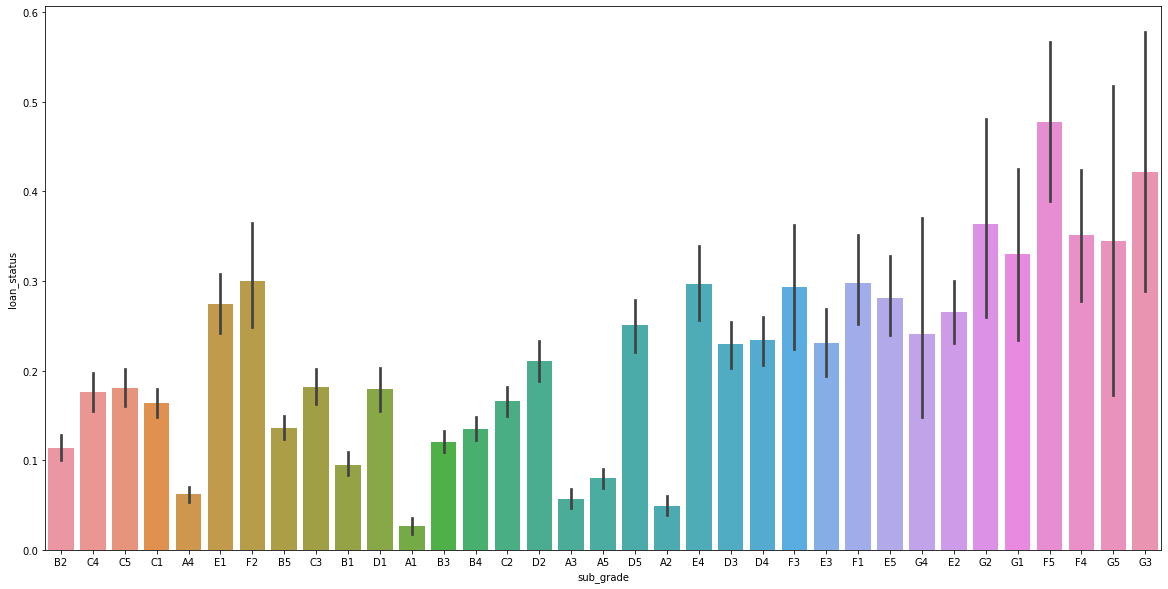

In [29]:
#Univariate analysis of default against sub_grade
plt.figure(figsize=(20, 10))
sns.barplot(x='sub_grade', y='loan_status', data=loan)
plt.show()

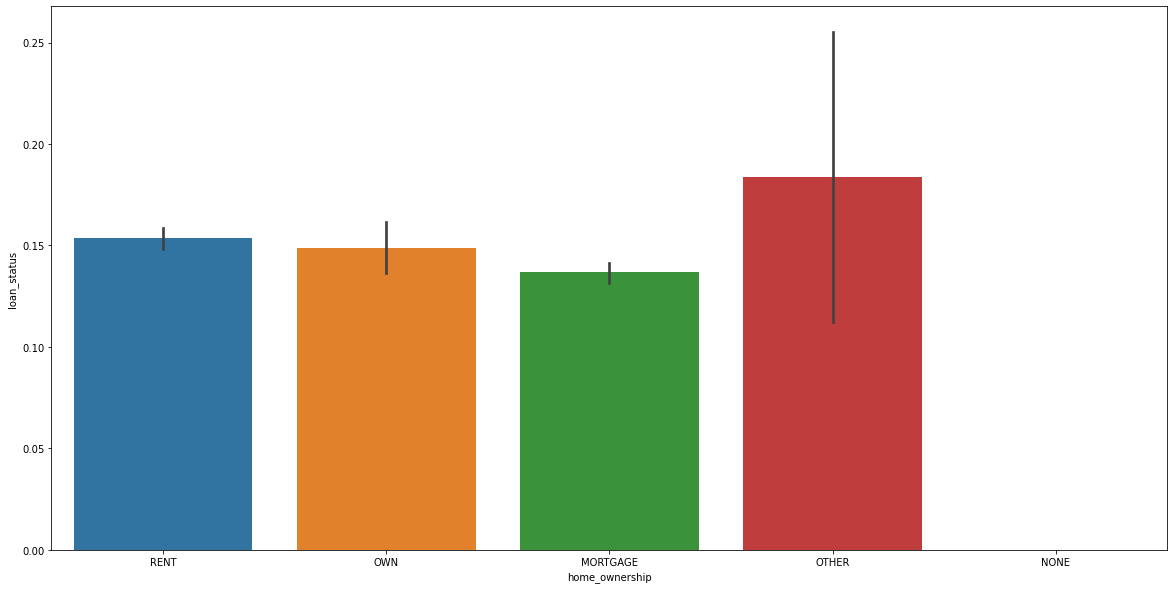

In [30]:
#Univariate analysis of default against home_ownership
plt.figure(figsize=(20, 10))
sns.barplot(x='home_ownership', y='loan_status', data=loan)
plt.show()

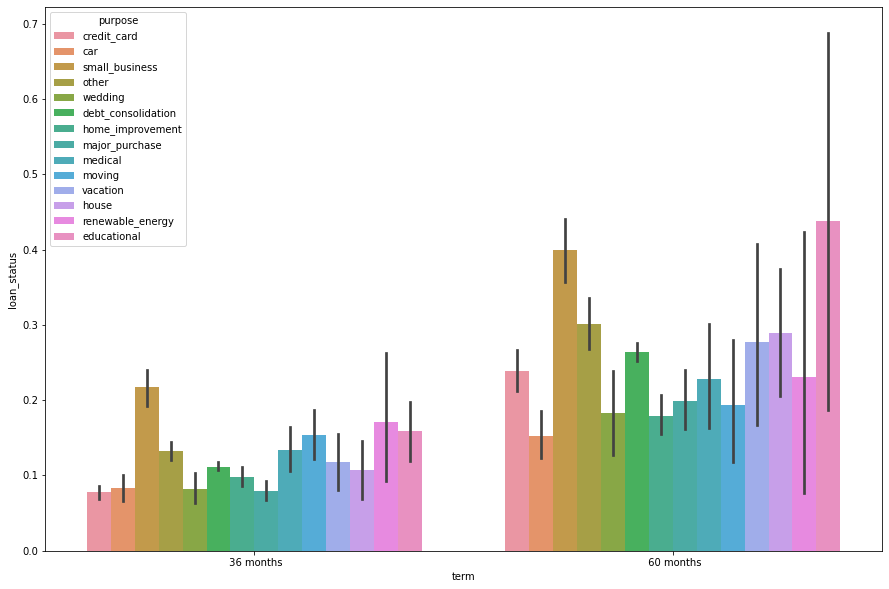

In [31]:
#Analysis of default comparing term and purpose
plt.figure(figsize=[15, 10])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

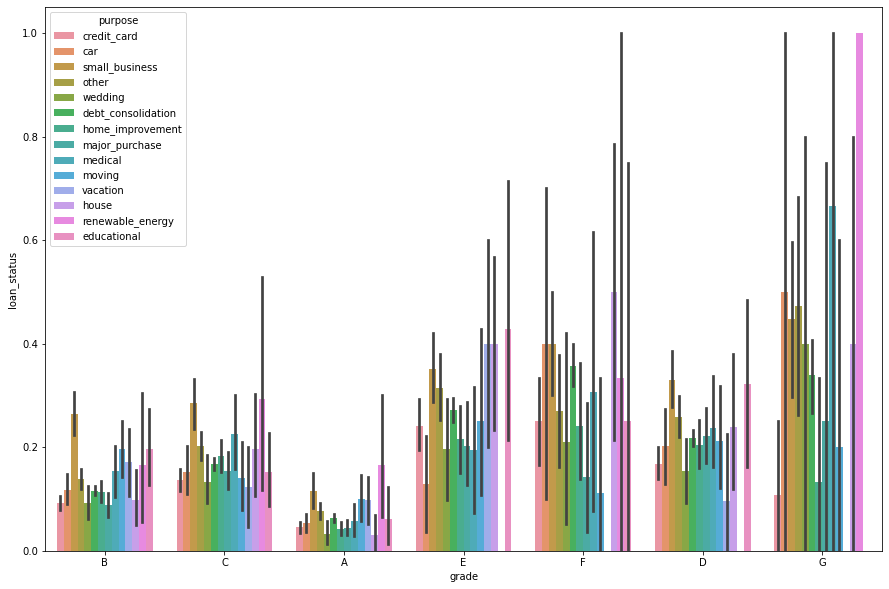

In [32]:
#This is a bivariate analysis comparing grade and purpose of loan to default rate
#Here we can see that F&G grade loan have the highest rate of default with (purpose mentioned)(colorblind) having highest&lowest
#rate of default respectively
plt.figure(figsize=[15, 10])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=loan)
plt.show()

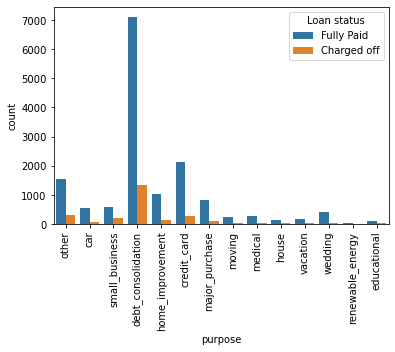

In [69]:
#countplot counts the no of observartions in table and loan status gives us no of default
#Ex:- Around 4000 credit cards were fully faid and 200 defaulted
sns.countplot(x='purpose', hue="loan_status", data=loan)
plt.legend(title='Loan status', loc='upper right', labels=['Fully Paid', 'Charged off'])
plt.xticks(rotation=90)
plt.show()

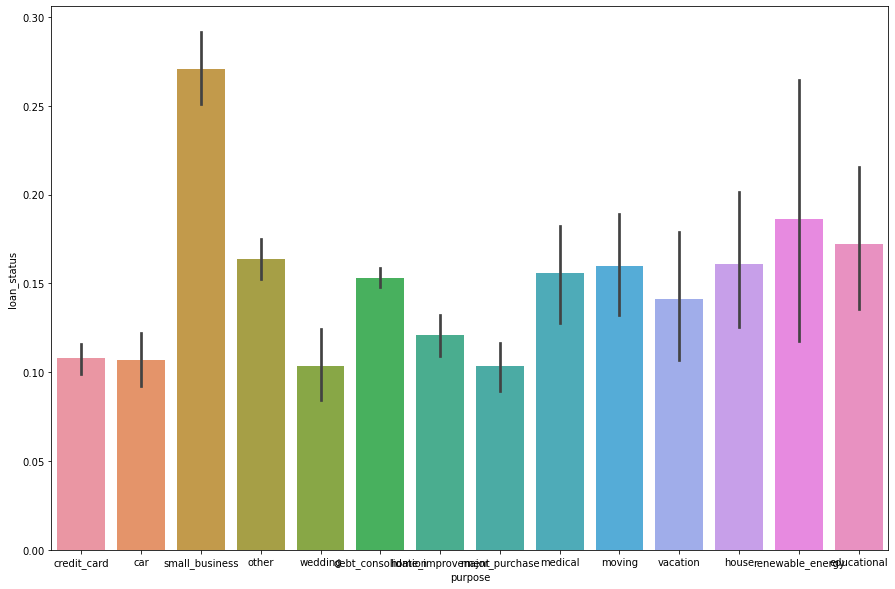

In [34]:
plt.figure(figsize=[15, 10])
sns.barplot(x='purpose', y="loan_status", data=loan)
plt.show()

In [35]:
#Here we are setting annual_inc greater than 40000 to Med to high and <40000 to low
loan.loc[loan['annual_inc'] >150000, 'annual_income'] = 'High'
loan.loc[(loan['annual_inc'] >= 40000) & (loan['annual_inc']<= 150000), 'annual_income'] = 'Med to high' 
loan.loc[loan['annual_inc'] < 40000, 'annual_income'] = 'Low'
loan.annual_income

0                Low
1                Low
2                Low
3        Med to high
5                Low
            ...     
39712    Med to high
39713            Low
39714    Med to high
39715           High
39716            Low
Name: annual_income, Length: 38577, dtype: object

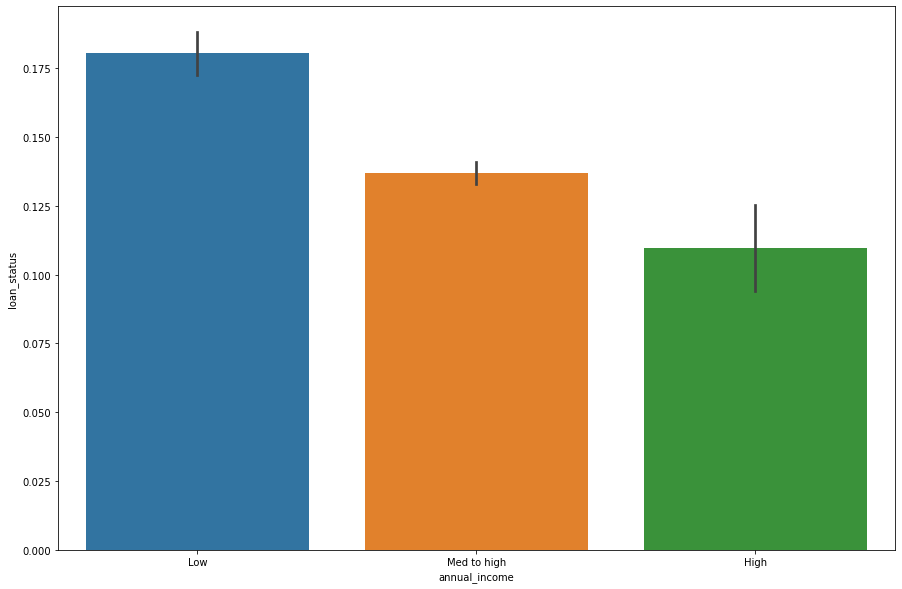

In [36]:
#Here we can see that as the income increases rate of default decreases
plt.figure(figsize=[15, 10])
sns.barplot(x='annual_income', y="loan_status", data=loan)
plt.show()

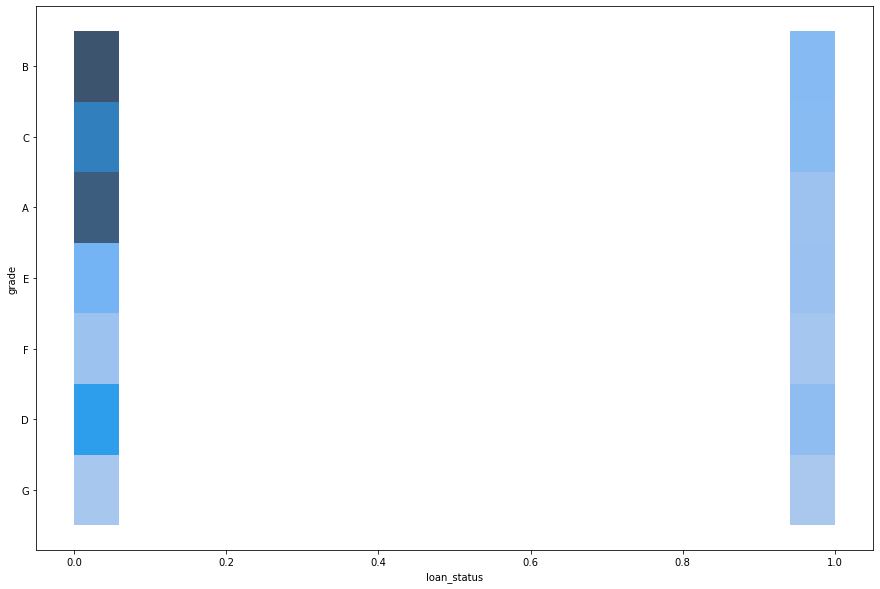

In [37]:
#analysis of grade against defaulters
plt.figure(figsize=[15, 10])
sns.histplot(data=loan,y='grade',x='loan_status')
plt.show()

In [38]:
#splitting issue date to issue month and issue year
m, y = loan['issue_d'].str.split('-').str

C:\Users\nitu3\AppData\Local\Temp/ipykernel_19844/2473226657.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  m, y = loan['issue_d'].str.split('-').str


In [39]:
loan['issue_y'] = pd.to_numeric(y)
loan['issue_y'] = 2000+loan['issue_y']
loan['issue_m'] = m

<Figure size 1080x720 with 0 Axes>

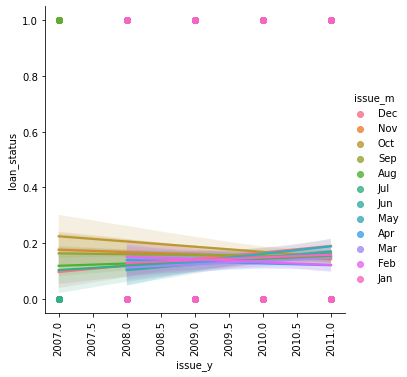

In [61]:
#plot of loan issue month and year on defulters 
plt.figure(figsize=[15, 10])
sns.lmplot(x='issue_y', y="loan_status",hue='issue_m', data=loan)
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x720 with 0 Axes>

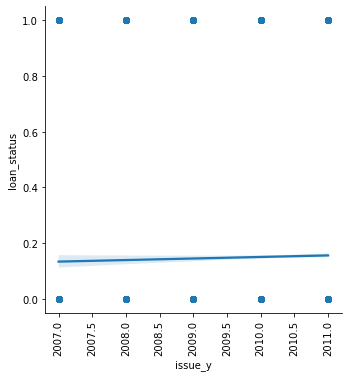

In [66]:
#plot of loan issue year against defulters 
plt.figure(figsize=[15, 10])
sns.lmplot(x='issue_y', y="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

In [58]:
heatmap1_data = pd.pivot_table(loan, values='loan_amnt', 
                     index=['annual_inc'], 
                     columns='loan_status')

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

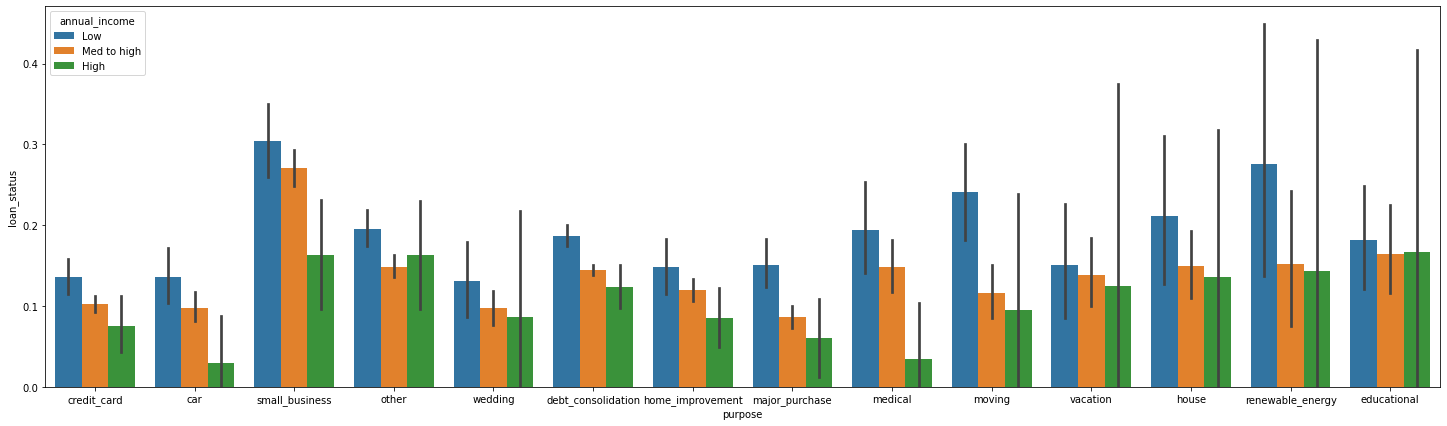

In [43]:
#plot of defaulter's annual income on purpose

plt.figure(figsize=[25,7])
sns.barplot(hue='annual_income', x='purpose',y='loan_status', data=loan)


<AxesSubplot:xlabel='term', ylabel='loan_status'>

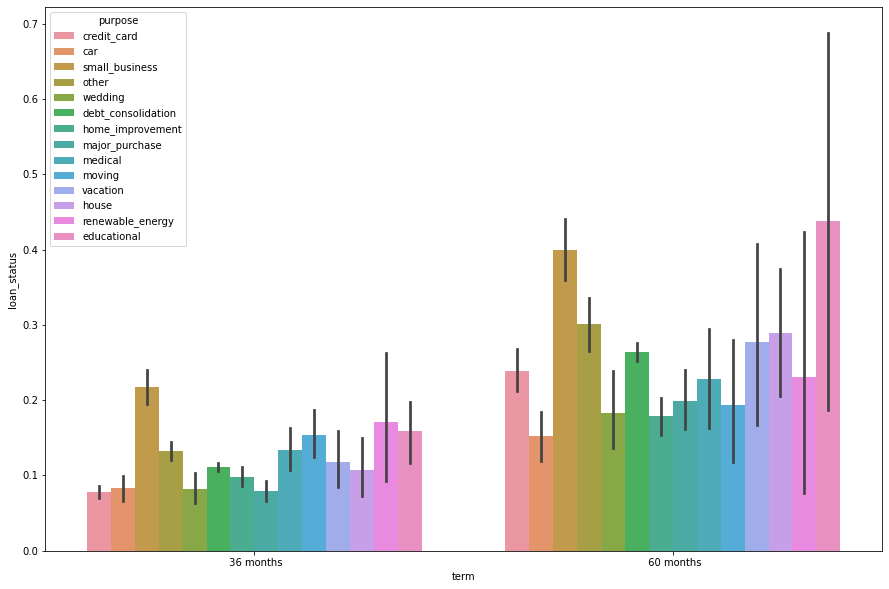

In [44]:
#plot of defaulter's term on purpose

plt.figure(figsize=[15,10])
sns.barplot(hue='purpose', x='term',y='loan_status', data=loan)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

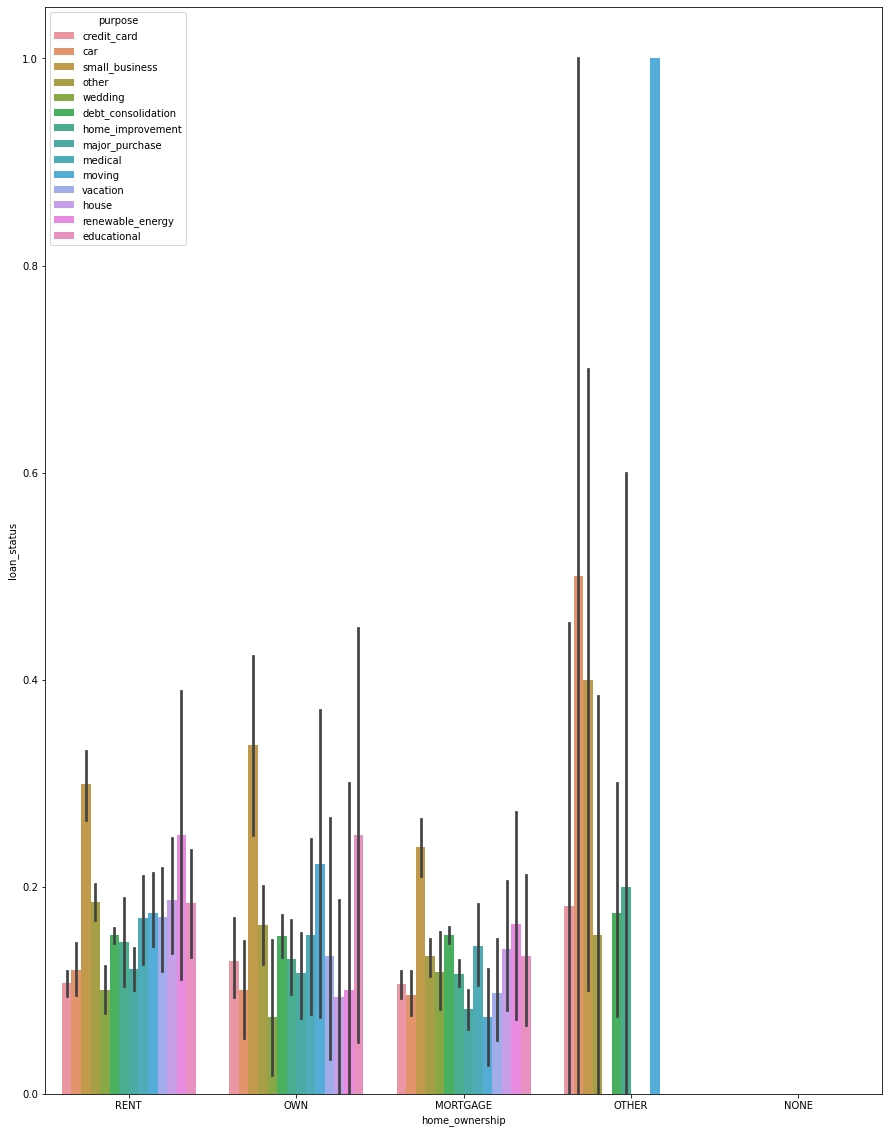

In [45]:
#plot of defaulter's term on purpose
plt.figure(figsize=[15,20])
sns.barplot(hue='purpose', x='home_ownership',y='loan_status', data=loan)

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

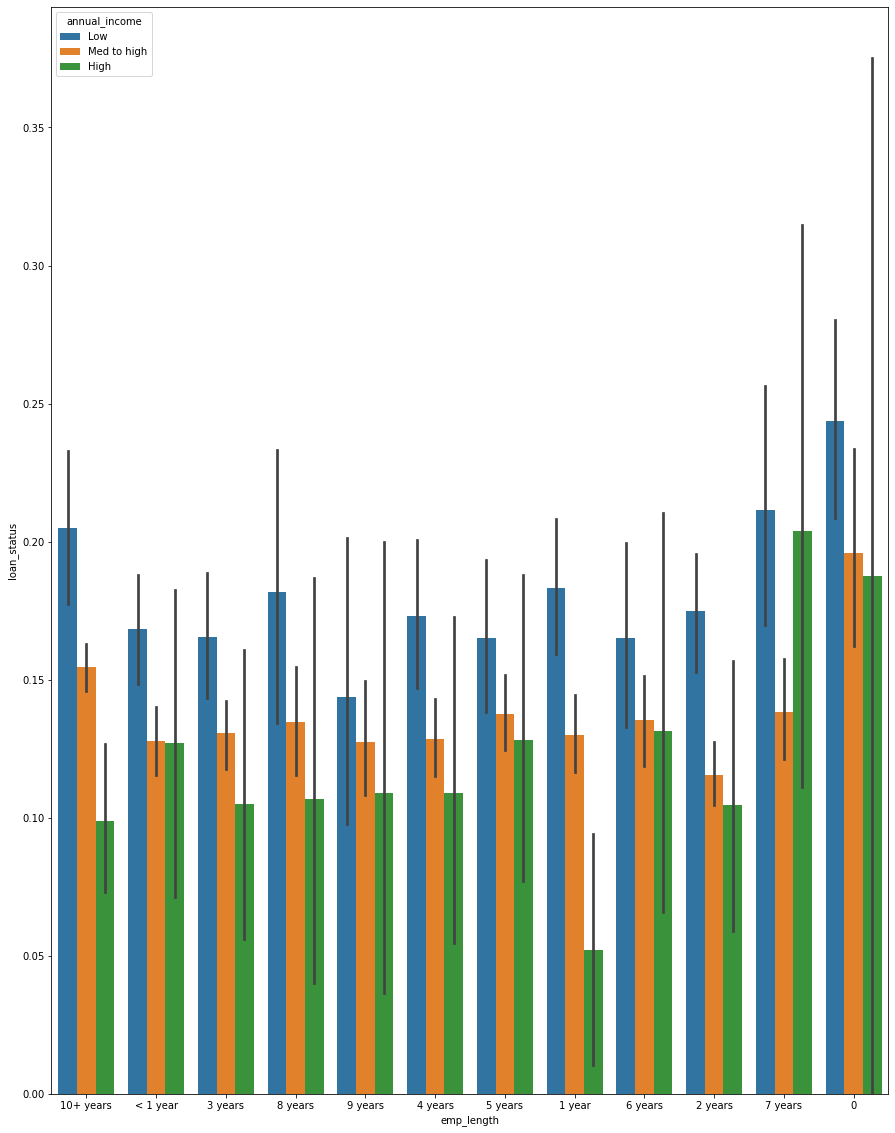

In [46]:
#plot of defaulter's employment length on income
plt.figure(figsize=[15,20])
sns.barplot(hue='annual_income', x='emp_length',y='loan_status', data=loan)

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

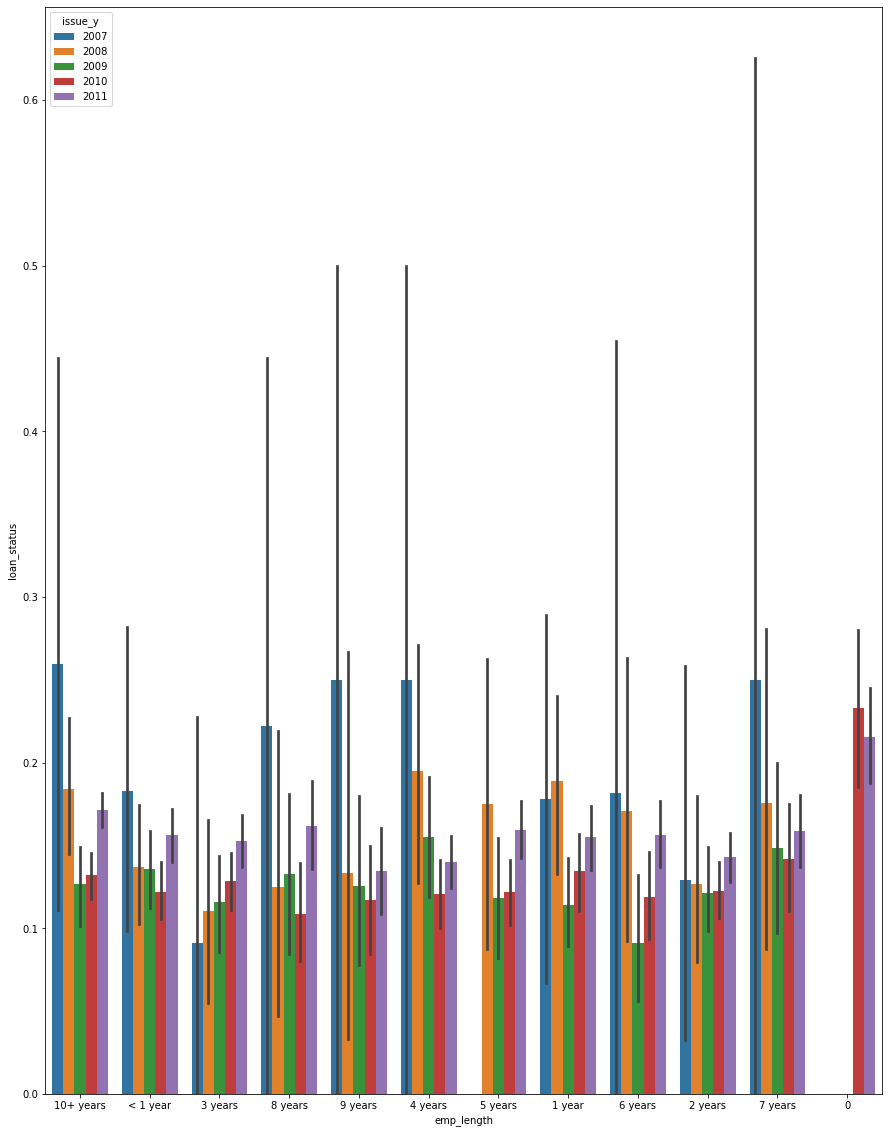

In [47]:
#plot of defaulter's employment length on issue year
plt.figure(figsize=[15,20])
sns.barplot(hue='issue_y', x='emp_length',y='loan_status', data=loan)

<AxesSubplot:xlabel='issue_m', ylabel='loan_status'>

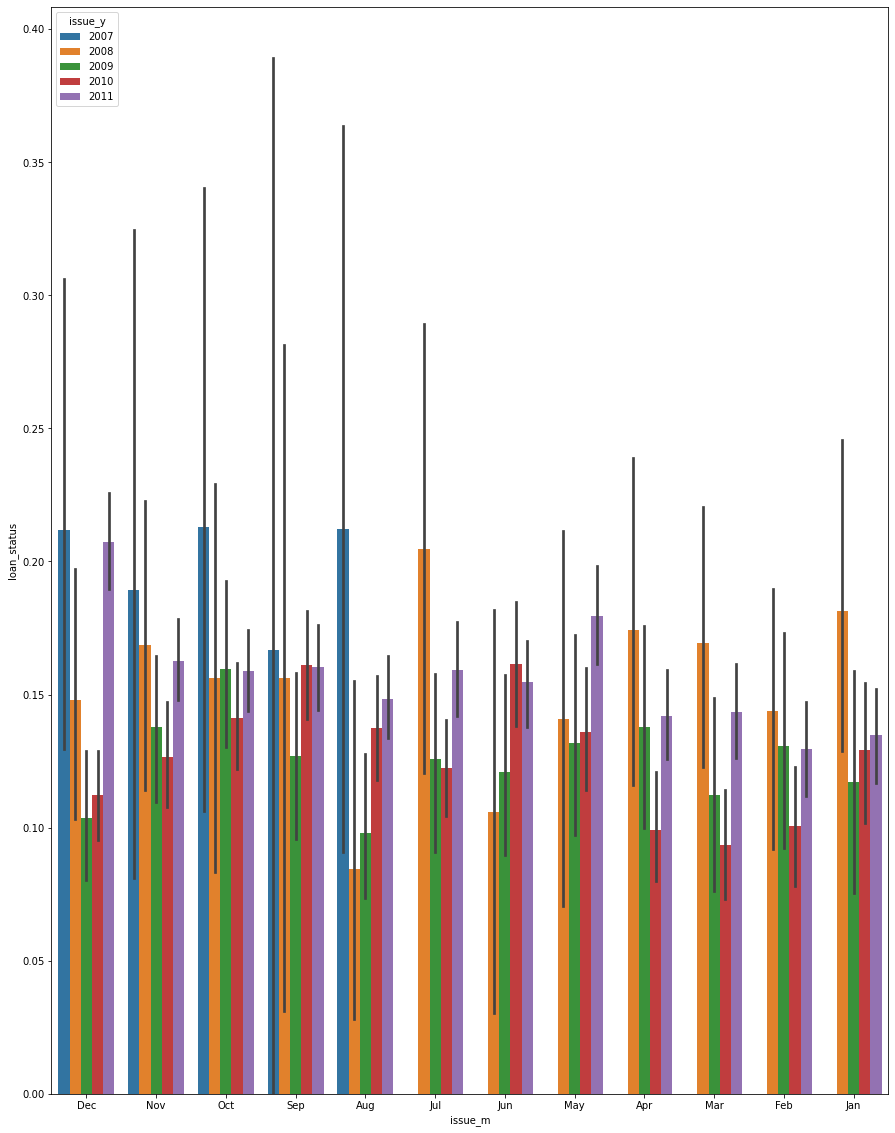

In [48]:
#plot of defaulter's issue year on issue month
plt.figure(figsize=[15,20])
sns.barplot(hue='issue_y', x='issue_m',y='loan_status', data=loan)

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

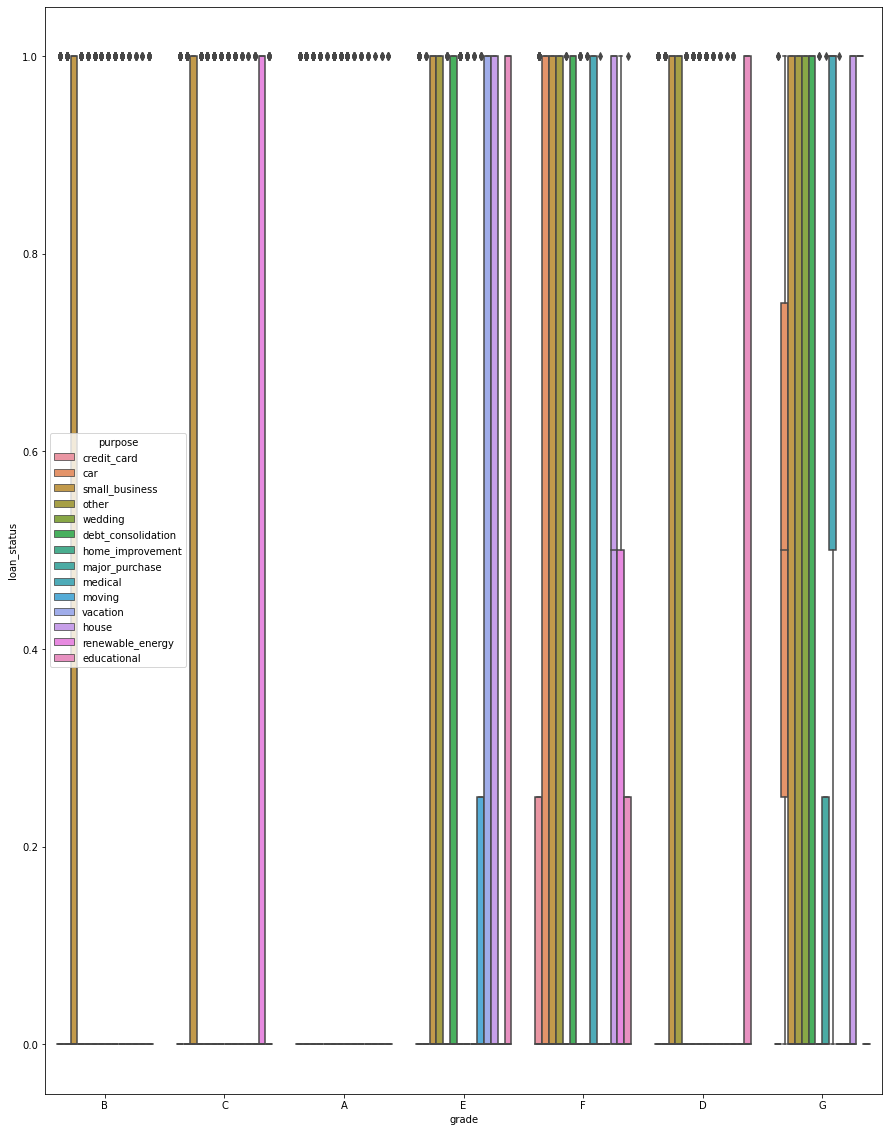

In [49]:
#plot of defaulter's grade vs loan purpose
plt.figure(figsize=[15,20])
sns.boxplot(x='grade', hue='purpose',y='loan_status', data=loan)

In [50]:
loan.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,issue_y
member_id,1.000000,0.120393,0.130307,0.241324,0.050808,0.070918,0.006442,0.039798,0.092910,-0.007905,...,0.093773,0.126660,-0.058497,0.036526,-0.012831,NaN,NaN,NaN,0.002390,0.883093
loan_amnt,0.120393,1.000000,0.981790,0.937922,0.301265,0.932260,0.268999,0.059463,0.062436,-0.031951,...,0.845870,0.728343,0.047103,0.142789,0.077005,NaN,NaN,NaN,-0.035141,0.109814
funded_amnt,0.130307,0.981790,1.000000,0.956172,0.304930,0.958035,0.264798,0.056497,0.062194,-0.031866,...,0.864082,0.736654,0.049465,0.143452,0.078769,NaN,NaN,NaN,-0.036189,0.120844
funded_amnt_inv,0.241324,0.937922,0.956172,1.000000,0.297473,0.905464,0.251981,0.037781,0.070663,-0.038171,...,0.838587,0.726736,0.029379,0.130997,0.064282,NaN,NaN,NaN,-0.036327,0.252332
int_rate,0.050808,0.301265,0.304930,0.297473,1.000000,0.277203,0.048899,0.211390,0.110913,0.158479,...,0.174717,0.521233,0.094319,0.128596,0.070013,NaN,NaN,NaN,0.084016,0.039417
installment,0.070918,0.932260,0.958035,0.905464,0.277203,1.000000,0.267842,0.027153,0.052038,-0.019755,...,0.847762,0.642655,0.058387,0.121463,0.077519,NaN,NaN,NaN,-0.033038,0.053066
annual_inc,0.006442,0.268999,0.264798,0.251981,0.048899,0.267842,1.000000,-0.040867,-0.121530,0.022229,...,0.256848,0.185056,0.006814,0.022184,0.015981,NaN,NaN,NaN,-0.015955,0.008558
loan_status,0.039798,0.059463,0.056497,0.037781,0.211390,0.027153,-0.040867,1.000000,0.045078,0.020096,...,-0.334944,0.013008,0.165115,0.339562,0.204914,NaN,NaN,NaN,0.046989,0.024451
dti,0.092910,0.062436,0.062194,0.070663,0.110913,0.052038,-0.121530,0.045078,1.000000,-0.033347,...,0.036755,0.103104,-0.011412,0.026162,0.011744,NaN,NaN,NaN,0.007315,0.092857
delinq_2yrs,-0.007905,-0.031951,-0.031866,-0.038171,0.158479,-0.019755,0.022229,0.020096,-0.033347,1.000000,...,-0.038447,0.023778,0.028772,0.012443,0.014077,NaN,NaN,NaN,0.002970,-0.003145


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='total_rec_prncp'>

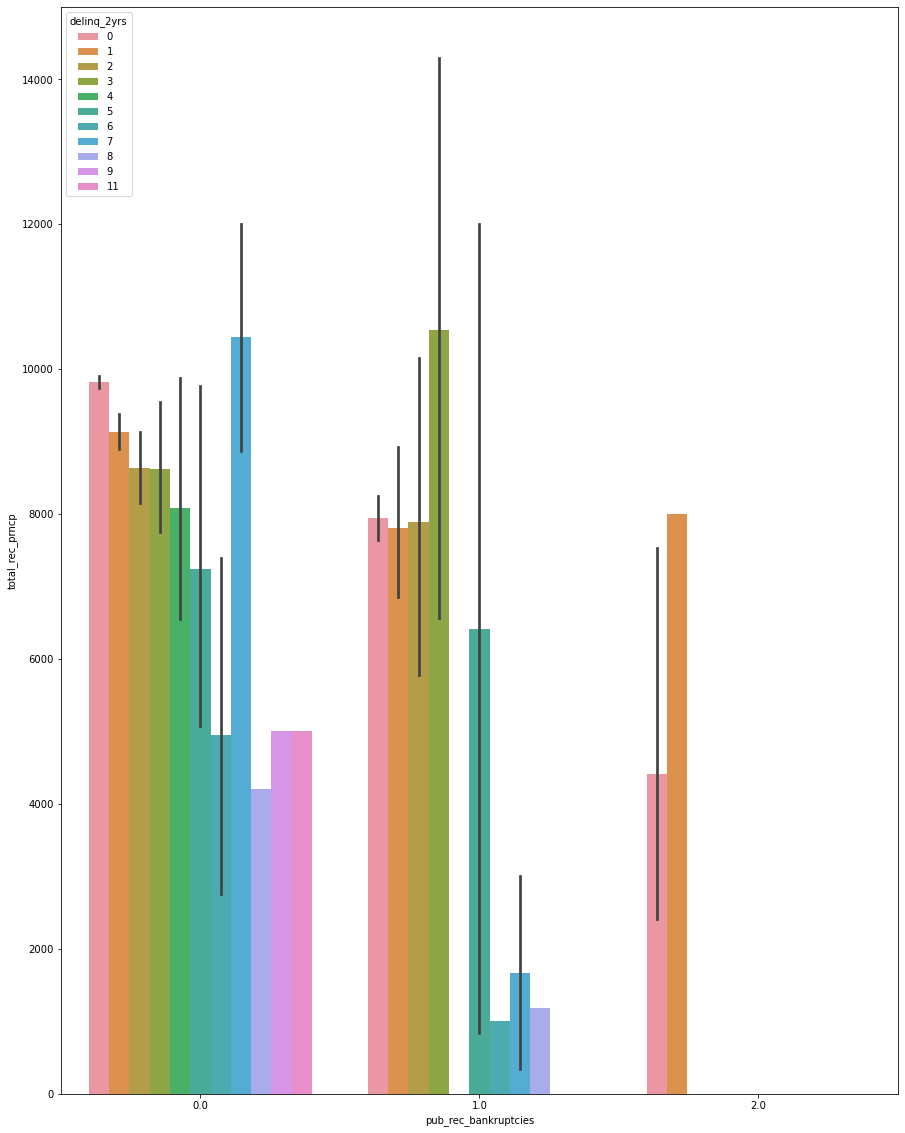

In [52]:
#plot of bank rupsies on total_rec_prncp
plt.figure(figsize=[15,20])
sns.barplot(x='pub_rec_bankruptcies', hue='delinq_2yrs',y='total_rec_prncp', data=loan)

<AxesSubplot:xlabel='issue_y', ylabel='loan_amnt'>

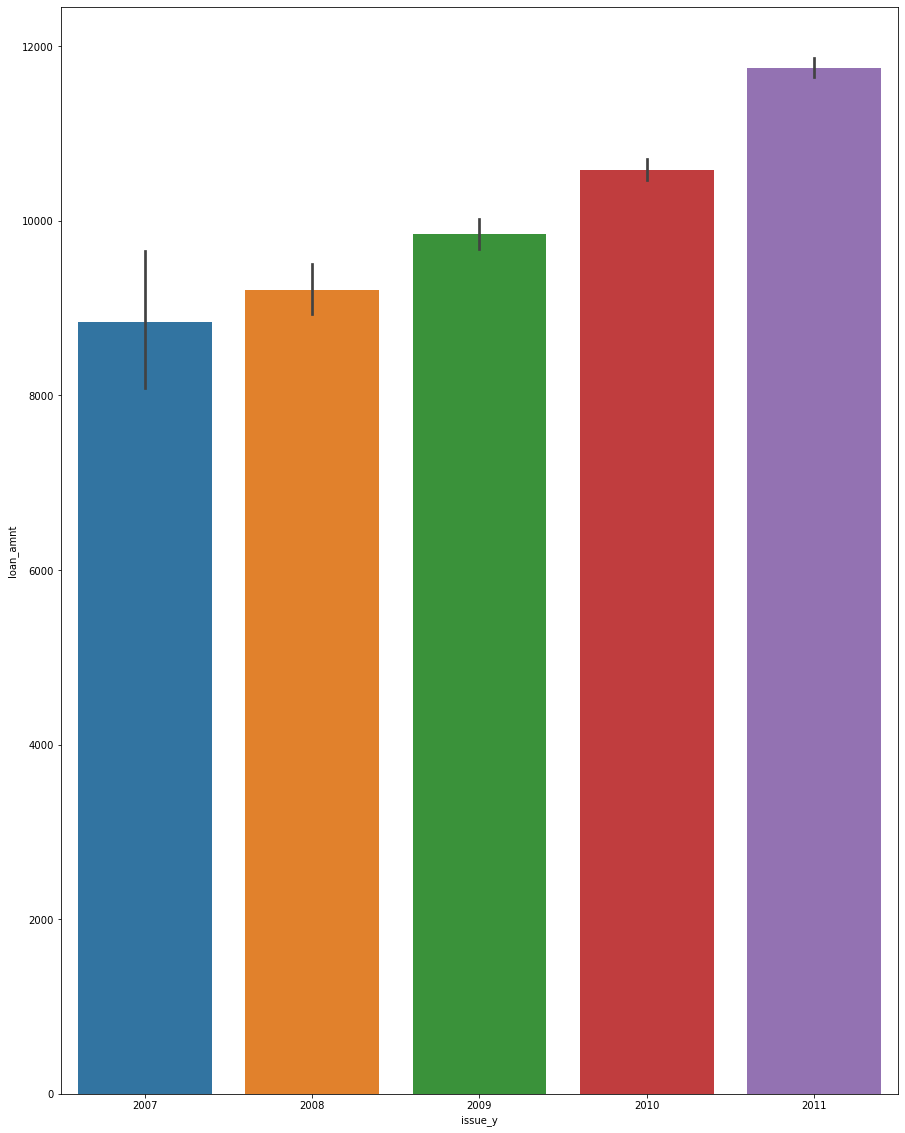

In [53]:
#plot issue_y vs loan_amount
plt.figure(figsize=[15,20])
sns.barplot(x='issue_y', y='loan_amnt', data=loan)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

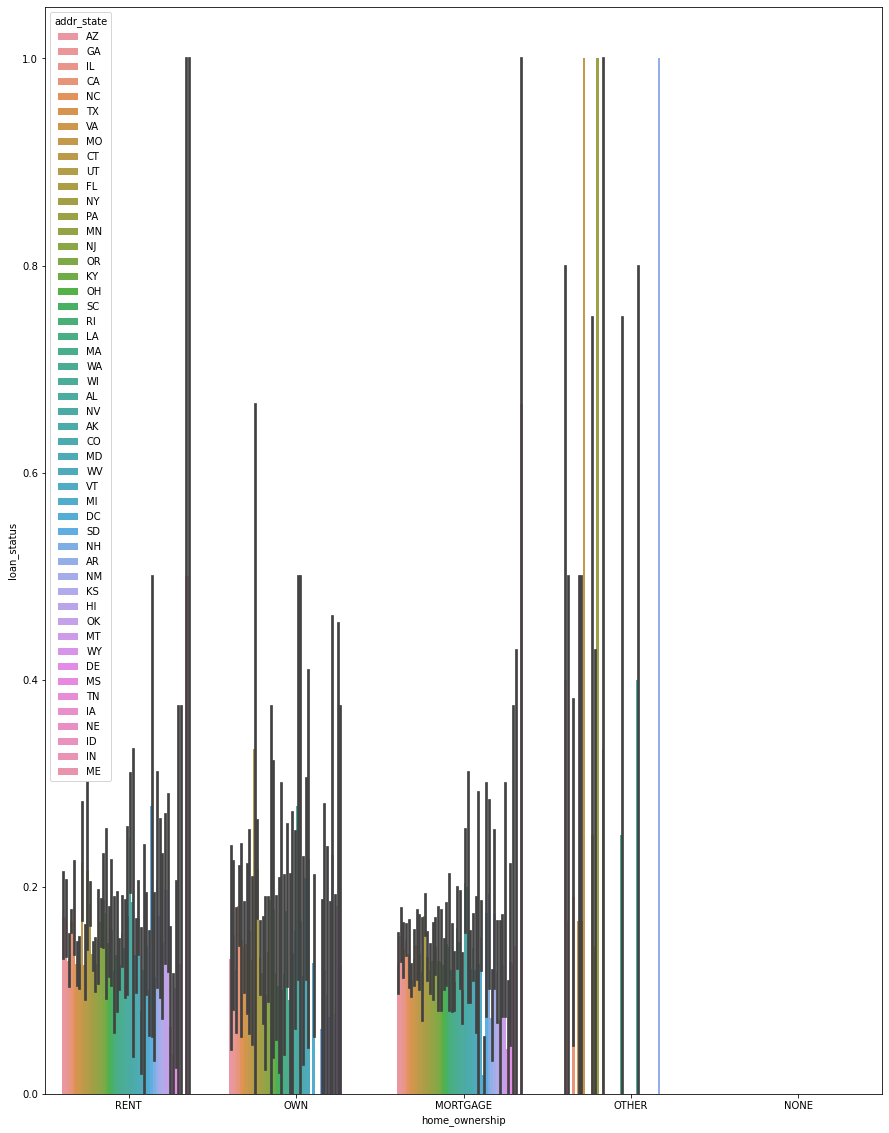

In [54]:
#plot defaulter's home_ownership on addr_state
plt.figure(figsize=[15,20])
sns.barplot(x='home_ownership', y='loan_status',hue='addr_state', data=loan)

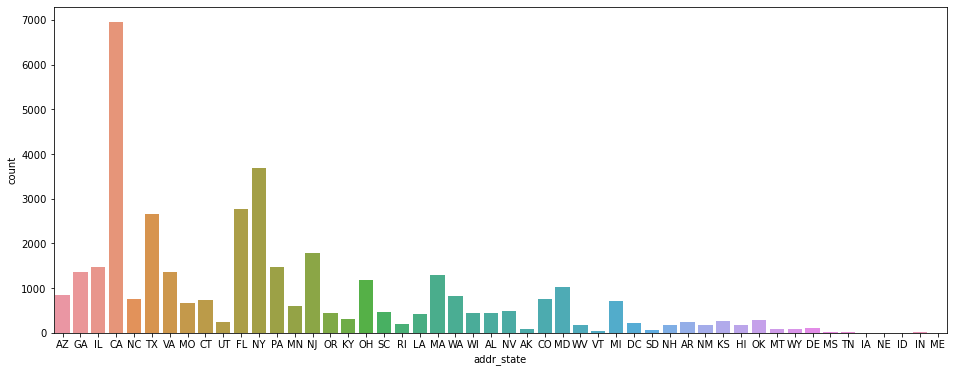

In [55]:
#distribution of loan applicants in in addr_state
plt.figure(figsize=(16, 6))
sns.countplot(x='addr_state', data=loan)
plt.show()

In [67]:
major_states =["CA","TX","FL",'NY','NJ']
loan = loan[loan['addr_state'].isin(major_states)]

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

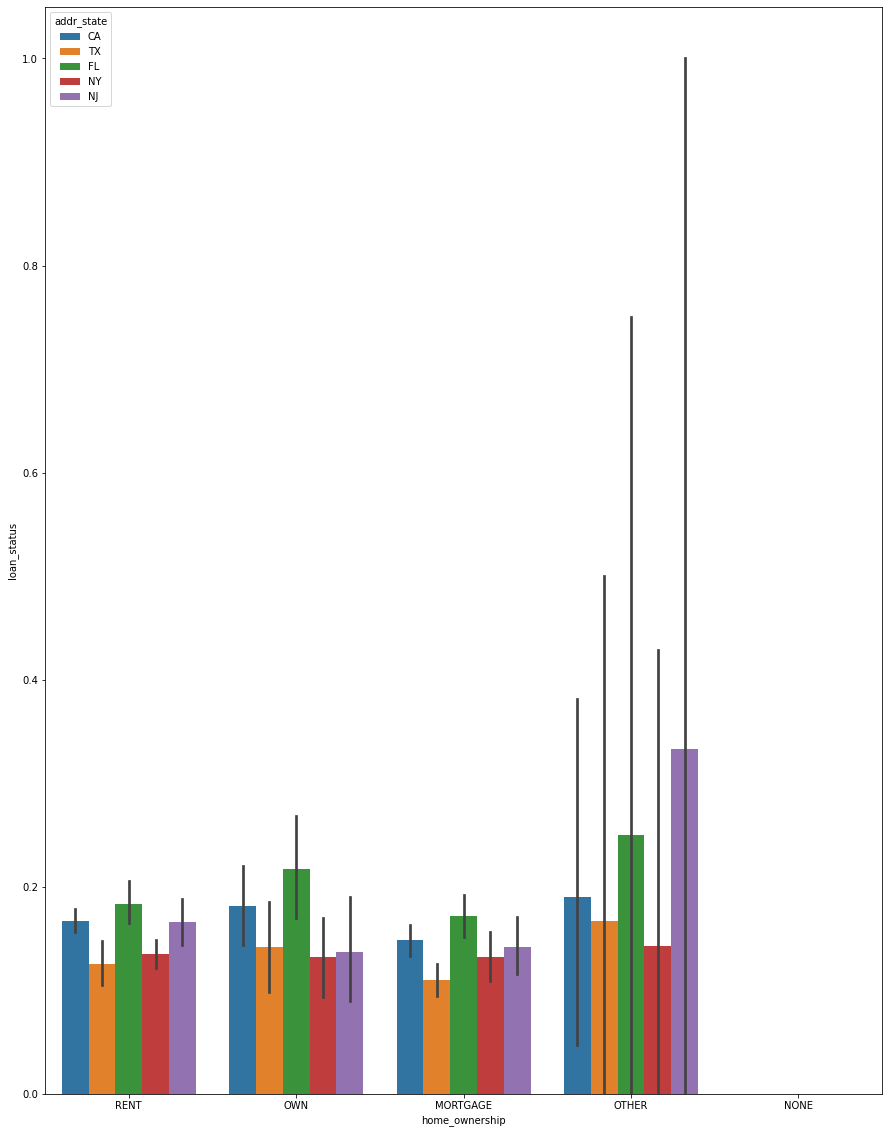

In [57]:
#distribution of loan applicants in in addr_state
plt.figure(figsize=[15,20])
sns.barplot(x='home_ownership', y='loan_status',hue='addr_state', data=loan)